In [5]:
#Packages
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
# crop function, can be useful outside the sliding window, returns an array equivalent to a rectangular "cut-out" of the picture :)
def crop(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped


 #define an otsu_i function, which sums up intensity values(zeros or ones) for each pixel 
 #and counts the amount of times a new value has been added for the pixel
def otsu_i(image):
    img=ot.otsu_thresholding(image, 256)
    it = np.zeros([img.shape[0],img.shape[1],2])
    for x, y in np.ndindex(img.shape[0],img.shape[1]):
            if img[x,y] == 0:
                it[x,y,0]+=1
            else:
                it[x,y,0]+=0
            it[x,y,1]+=0.5
    return it



In [7]:
#method 1 : mode of foreground and background assignment
def i_sw(image,stepsize,framesize):

    #copy the image so it does not influence the original
    img=copy(image)
    
    #create a 3 dimensional null array, the size of the image * 2, we can now save 2 separate values for each pixel
    array=np.zeros([img.shape[0],img.shape[1],2])

    #set the first coordinates for iteration over the image
    x=0
    y=0

   

        #iterate crop function with a given size over the picture, while the "window" fits inside the image, 
        #for each window crop the image to window coordinates and perform otsu_i 
    
    while x+framesize<=img.shape[0]:
        while y+framesize<=img.shape[1]:
            window=crop(img,x,y,x+framesize, y+framesize)
            it = otsu_i(window)

            # for each pixel that fits into the current window, add the values from otsu_i 
            #generated array to according pixels in the big array
            for a, b in np.ndindex(window.shape[0], window.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]+=it[a,b,0]
                array[c,d,1]+=it[a,b,1]
            y+=stepsize
        y=0
        x+=stepsize

    # because array is 3 dimensional and picture is 2 dimensional the final intensities will
    # be determined by 'array', but saved into a final 'img' array (rewriting the copy of image)
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        #img[i,j]=round(array[i,j,0]/(2*array[i,j,1]))
        if array[i,j,0]>array[i,j,1]:
            img[i,j]=0
        else:
            img[i,j]=255
    figure()
    imshow(img,'gray')
    return img

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

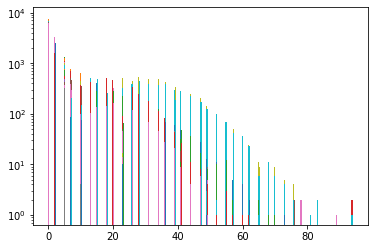

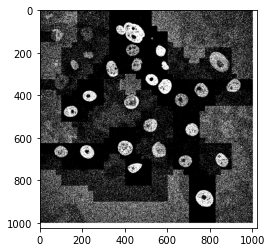

<Figure size 432x288 with 0 Axes>

In [9]:
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-0.png") 
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t52.tif")
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
figure()
#sw1 = i_sw(img_1, 150, 350)
figure()
sw2 = i_sw(img_2, 75, 100)
figure()
#sw3 = i_sw(img_3, 150, 350)